<a href="https://colab.research.google.com/github/luiseduardoballarati/MSc-CS-Dissertation/blob/main/Dataset_Overview_3_GH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from collections import defaultdict
import re
from datetime import datetime
import spacy
import plotly.express as px
from collections import defaultdict

In [2]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [3]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/datasets/business_guardian_articles_1.csv')
df2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/datasets/politics_guardian_articles_1.csv')
df3 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/datasets/tech_guardian_articles_1.csv')
df4 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/datasets/world_guardian_articles_1.csv')
df5 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/datasets/science_guardian_articles_1.csv')
df6 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Bath/Dissertation/The Guardian Datasets/datasets/culture_guardian_articles.csv')

In [4]:
df = pd.concat([df1, df2, df3, df4, df5, df6], ignore_index=True)

In [5]:
df['webPublicationDate'] = pd.to_datetime(df['webPublicationDate'])

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154455 entries, 0 to 154454
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype              
---  ------              --------------   -----              
 0   type                154455 non-null  object             
 1   sectionId           154455 non-null  object             
 2   sectionName         154455 non-null  object             
 3   webPublicationDate  154455 non-null  datetime64[ns, UTC]
 4   webTitle            154455 non-null  object             
 5   webUrl              154455 non-null  object             
 6   content             153812 non-null  object             
dtypes: datetime64[ns, UTC](1), object(6)
memory usage: 8.2+ MB


In [7]:
df.dropna(inplace=True)

# About the dataset
- 111474 news, divided between several topics, but majoirly politcs and business. We have 7 features, type, sectionId, sectionName, webpublicationDate, webTitle, webUrl and content.
- On average, a text has 991 words. We have articles (96%), liveblogs and interactives. The maximimun words per text is 36402 and the minimun is 1.

In [8]:
df.shape

(153812, 7)

In [9]:
print(f'df1: {df1["webPublicationDate"].max()}, df2: {df2["webPublicationDate"].max()}, df3: {df3["webPublicationDate"].max()}, df4: {df4["webPublicationDate"].max()}, df5: {df5["webPublicationDate"].max()}')
print(f'df1: {df1["webPublicationDate"].min()}, df2: {df2["webPublicationDate"].min()}, df3: {df3["webPublicationDate"].min()}, df4: {df4["webPublicationDate"].min()}, df5: {df5["webPublicationDate"].min()}')

df1: 2018-01-31T21:42:35Z, df2: 2018-01-31T23:23:31Z, df3: 2018-01-31T21:42:35Z, df4: 2018-01-31T23:23:31Z, df5: 2018-01-31T21:06:49Z
df1: 2015-02-23T00:01:00Z, df2: 2015-02-23T10:12:13Z, df3: 2015-02-23T00:12:52Z, df4: 2016-02-06T22:27:36Z, df5: 2015-02-23T06:00:07Z


In [11]:
types = df['type'].value_counts()
fig = px.pie(types, values='count', names=types.index, title='Type of data in the corpus')
fig.show()

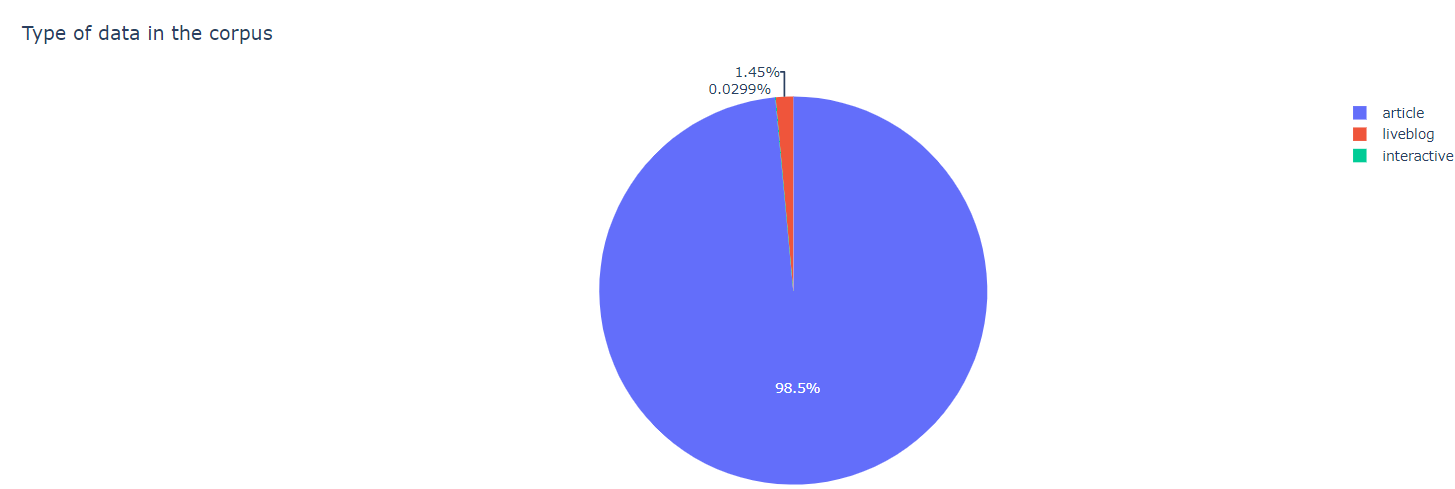

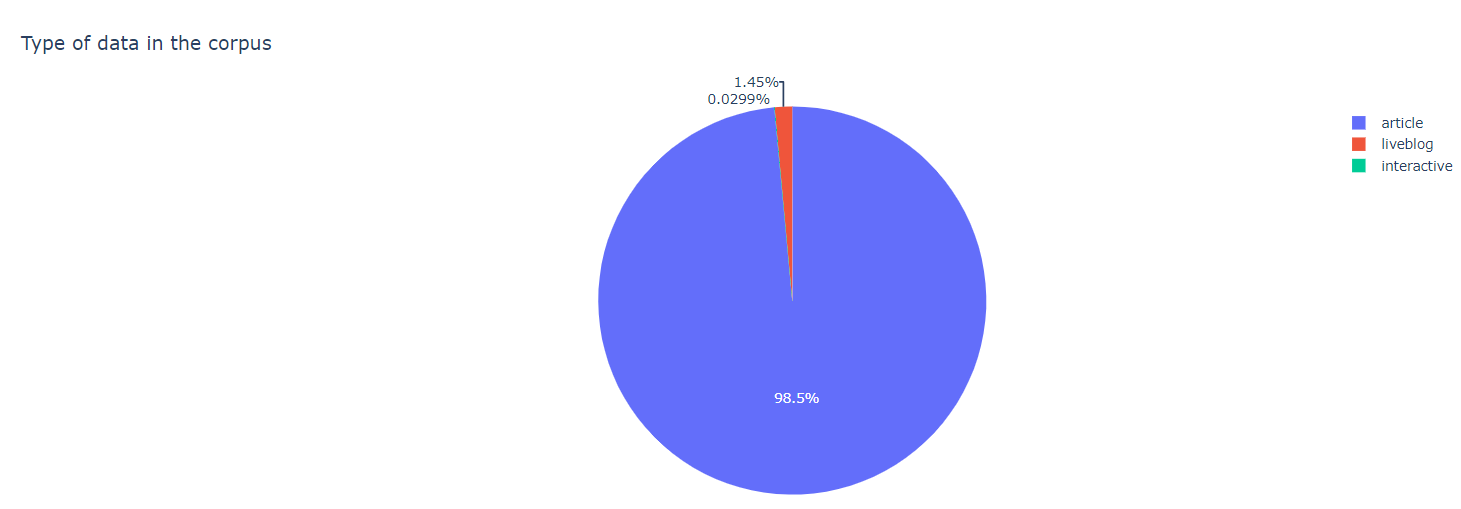

In [13]:
section = df['sectionId'].value_counts()
fig = px.bar(section, x=section.index, y='count')
fig.show()

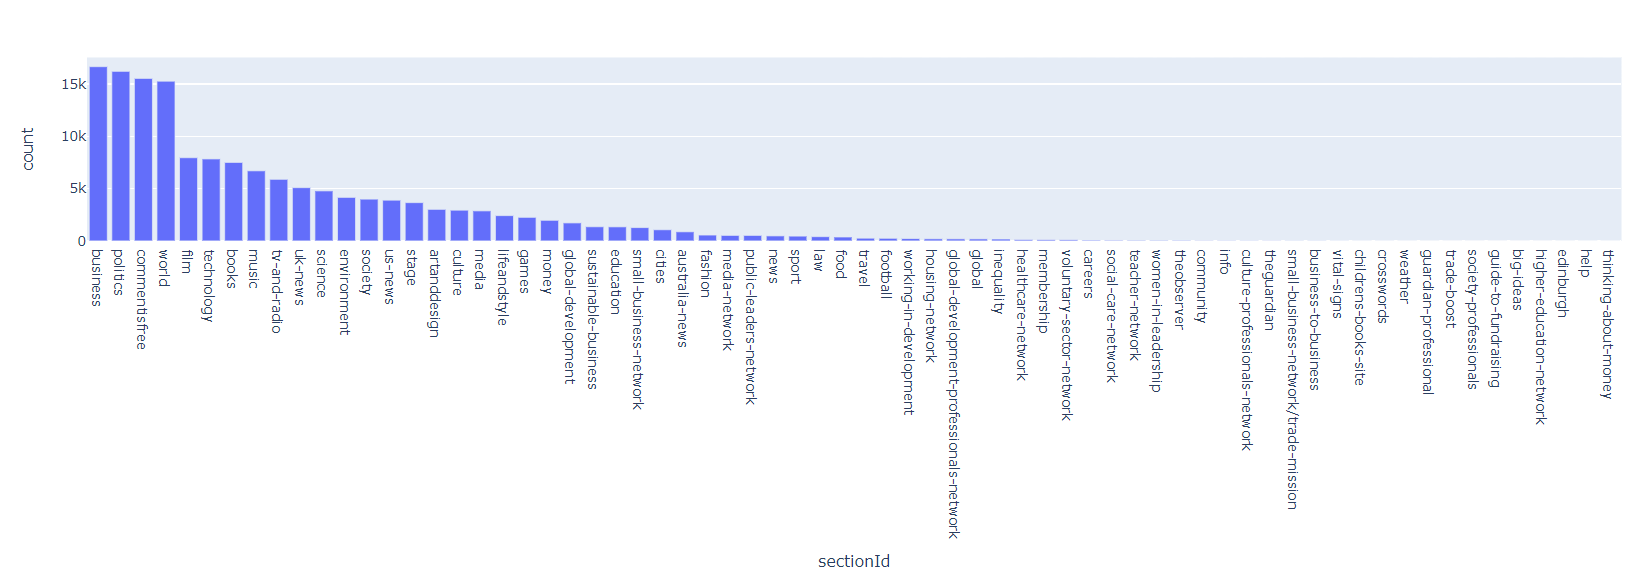

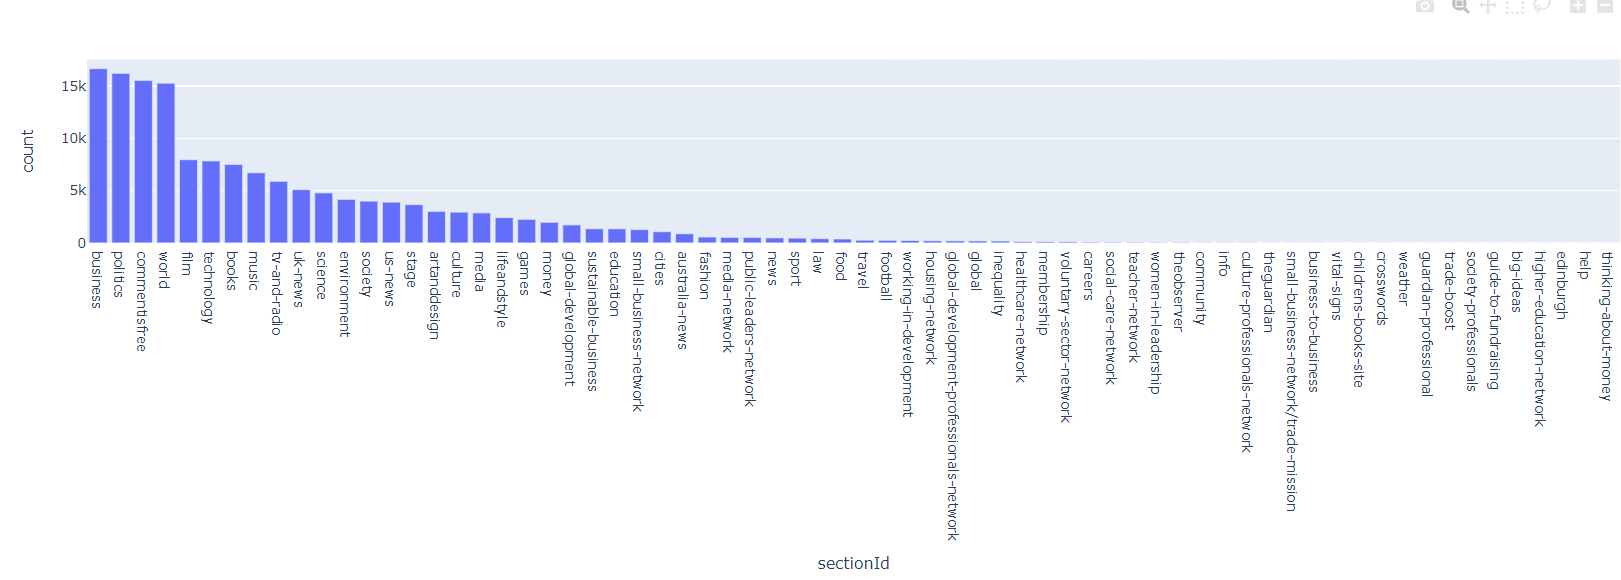

In [14]:
def count_words(text):
    return len(text.split())

In [15]:
df['Word Count'] = df['content'].apply(lambda x: count_words(x))

In [16]:
df.describe()

,Word Count
count,153812.000000
mean,870.246678
std,934.846794
min,1.000000
25%,494.000000
50%,723.000000
75%,973.000000
max,42916.000000


In [17]:
fig = px.box(df, y="Word Count")
fig.show()

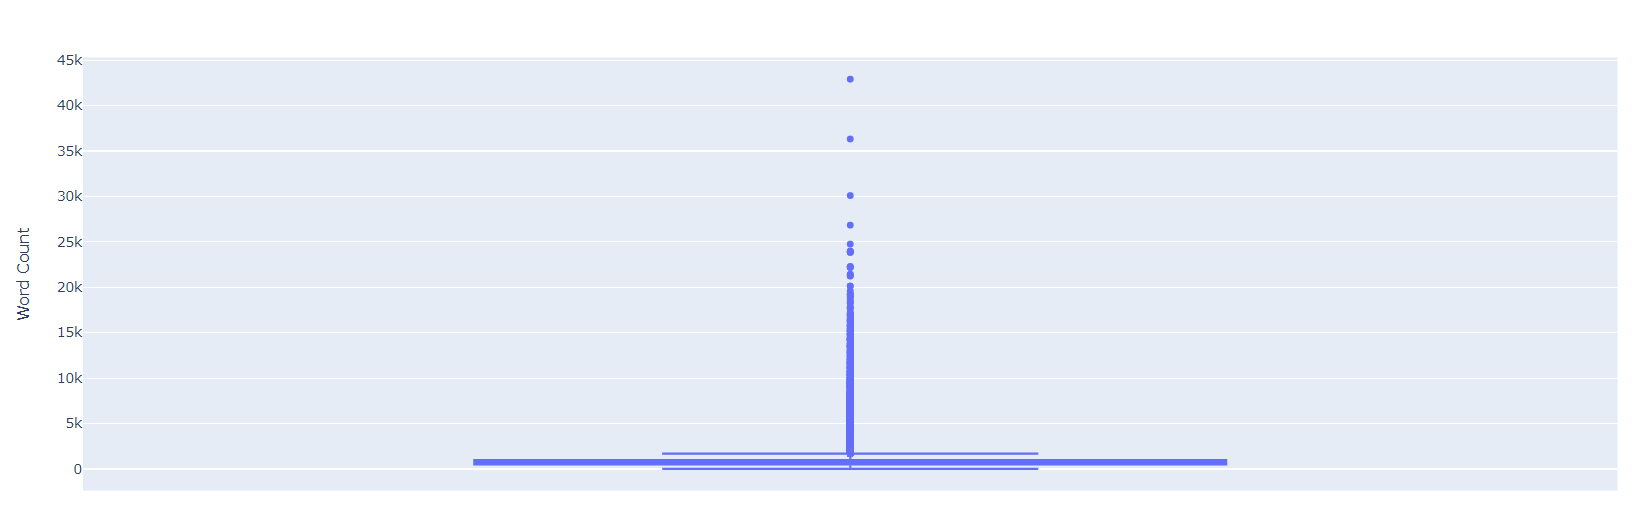

In [18]:
df['Year'] = df['webPublicationDate'].dt.year
info_per_year = df.groupby(['Year']).count()
# Create the plot
fig = px.line(info_per_year, x=info_per_year.index, y='Word Count', title='Number of Press Releases per Year')

# Customize the layout
fig.update_layout(
    xaxis_title='Year',
    yaxis_title='News',
    title='Number of News (articles, liveblogs and interactives) per Year',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

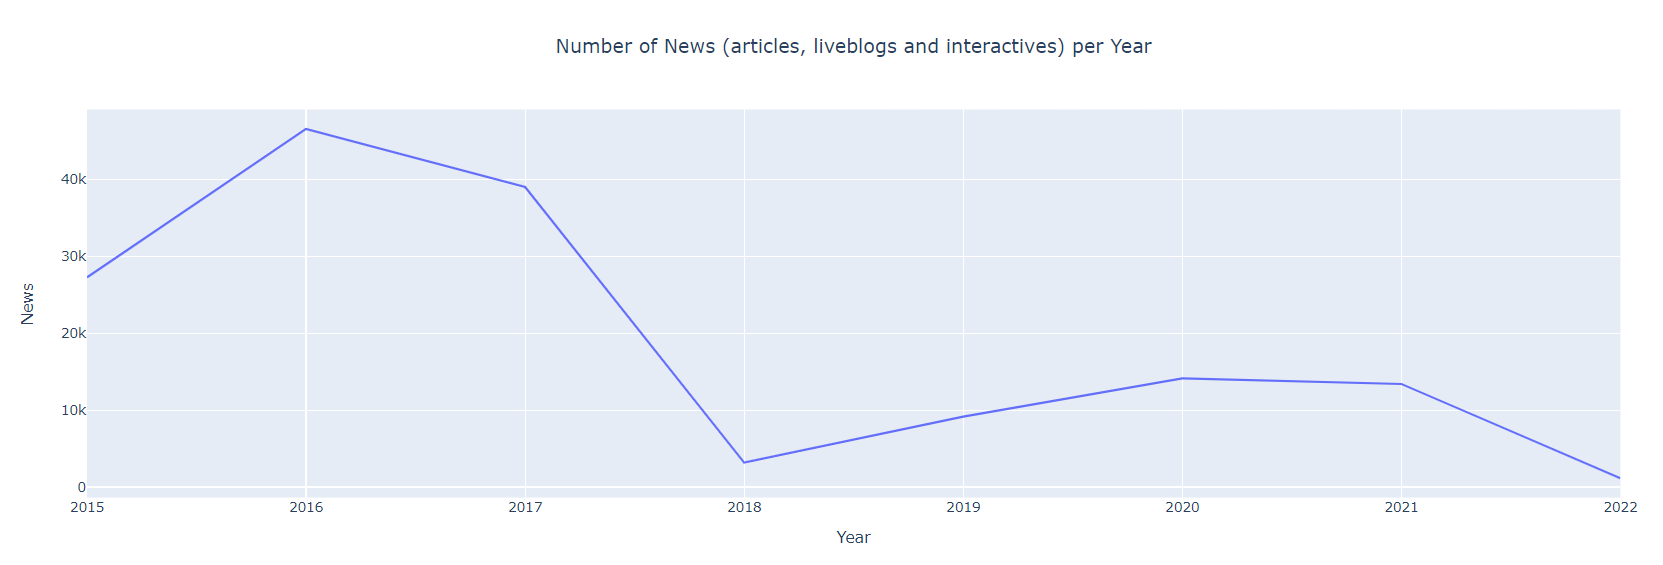

In [19]:
df['Month'] = df['webPublicationDate'].dt.month
info_per_year = df.groupby(['Month']).count()
# Create the plot
fig = px.line(info_per_year, x=info_per_year.index, y='Word Count', title='Number of Press Releases per Year')

# Customize the layout
fig.update_layout(
    xaxis_title='Month',
    yaxis_title='News',
    title='Number of News (articles, liveblogs and interactives) per Month',
    title_x=0.5  # Center the title
)

# Show the plot
fig.show()

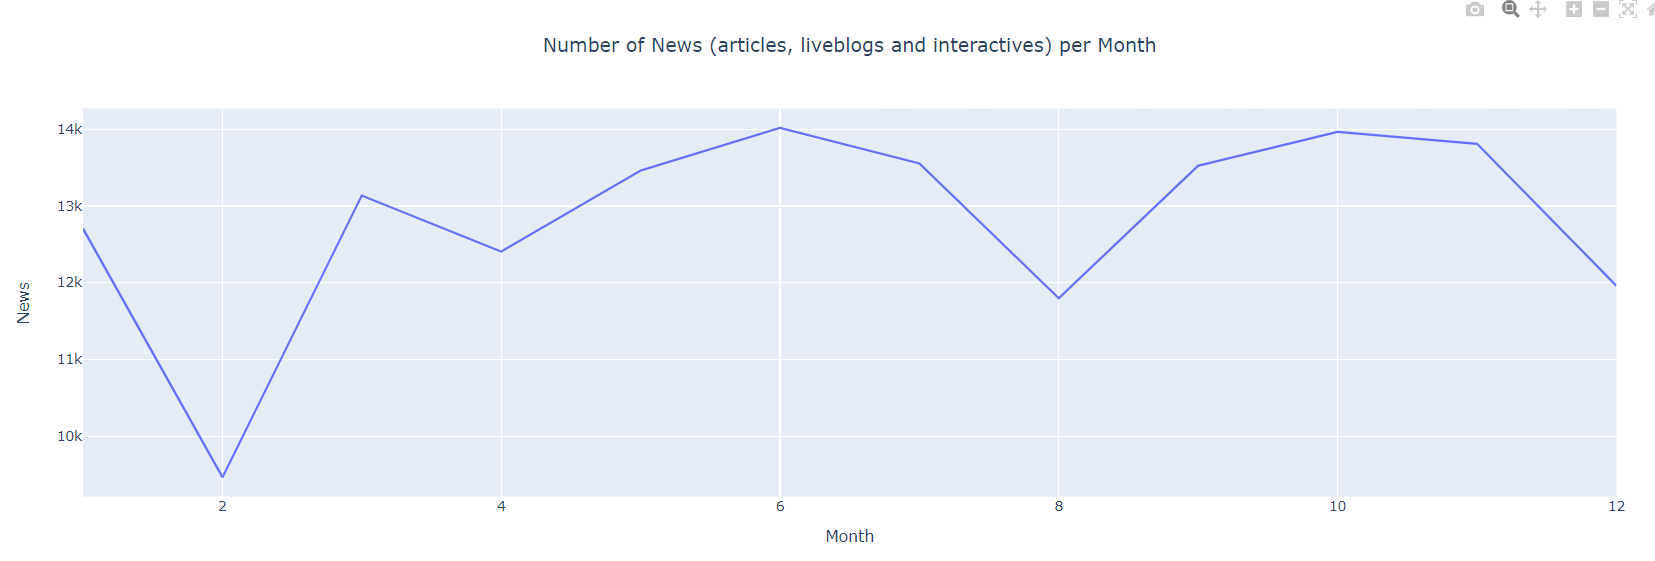

# NLP

In [20]:
# Initialize a default dictionary to count word occurrences
word_count = defaultdict(int)

# Populate the word_count dictionary
for text in df['content']:
    # Convert the text to lower case and split it into tokens
    tokens = text.lower().split()
    for token in tokens:
        word_count[token] += 1

# Convert defaultdict to a regular dictionary
word_count = dict(word_count)

In [21]:
# Tokenize the words to get their POS tags
words = list(word_count.keys())
pos_tags = pos_tag(words)

# Create a new dictionary with the POS tags
word_dict_with_pos = {word: (word_count[word], pos) for word, pos in pos_tags}

word_dict_with_pos

{'facebook’s': (2408, 'JJ'),
 'profits': (8332, 'NNS'),
 'soared': (986, 'VBD'),
 '61%,': (26, 'CD'),
 'spurred': (591, 'VBN'),
 'by': (701470, 'IN'),
 'growth': (36108, 'NN'),
 'in': (2650138, 'IN'),
 'mobile': (10653, 'JJ'),
 'users': (12255, 'NNS'),
 'at': (623827, 'IN'),
 'the': (7997317, 'DT'),
 'end': (57952, 'NN'),
 'of': (3668085, 'IN'),
 'last': (150497, 'JJ'),
 'year,': (37780, 'JJ'),
 'company': (59043, 'NN'),
 'announced': (25037, 'VBD'),
 'on': (1098187, 'IN'),
 'wednesday,': (4768, 'NN'),
 'as': (909311, 'IN'),
 'co-founder': (3477, 'JJ'),
 'mark': (17281, 'NN'),
 'zuckerberg': (1594, 'NN'),
 'said': (331645, 'VBD'),
 '2017': (8803, 'CD'),
 'had': (347246, 'VBD'),
 'been': (353324, 'VBN'),
 'one': (286969, 'CD'),
 'company’s': (11669, 'NN'),
 'more': (366897, 'RBR'),
 'difficult': (21286, 'JJ'),
 'years': (110876, 'NNS'),
 'a': (3205309, 'DT'),
 'public': (87801, 'JJ'),
 'company.': (4991, 'NN'),
 'has': (635104, 'VBZ'),
 'vowed': (1897, 'VBN'),
 'to': (3828147, 'TO'),
 '

In [22]:
len(word_dict_with_pos)

1437835

In [23]:
import heapq

# Get the 20 highest values
top_20 = heapq.nlargest(20, word_count.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict = dict(top_20)

top_20_dict

{'the': 7997317,
 'to': 3828147,
 'of': 3668085,
 'and': 3212032,
 'a': 3205309,
 'in': 2650138,
 'that': 1575545,
 'is': 1521030,
 'for': 1258891,
 'on': 1098187,
 'it': 973497,
 'as': 909311,
 'with': 879391,
 'was': 868291,
 'be': 749506,
 'by': 701470,
 'he': 695595,
 'are': 678359,
 'have': 654113,
 'has': 635104}

In [24]:
nn = {k: v for k, v in word_dict_with_pos.items() if v[1] == 'NN'}
nns = {k: v for k, v in word_dict_with_pos.items() if v[1] == 'NNS'}
nnp = {k: v for k, v in word_dict_with_pos.items() if v[1] == 'NNP'}
nnps = {k: v for k, v in word_dict_with_pos.items() if v[1] == 'NNPS'}
v = {k: v for k, v in word_dict_with_pos.items() if v[1].startswith("V")}

In [25]:
# Get the 20 highest values
top_20_nn = heapq.nlargest(20, nn.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict_nn = dict(top_20_nn)

In [26]:
# Extract keys and counts
keys = list(top_20_dict_nn.keys())
counts = [v[0] for v in top_20_dict_nn.values()]

# Create a DataFrame from the dictionary
df0 = pd.DataFrame(list(top_20_dict_nn.items()), columns=['word', 'value'])
df0['count'] = df0['value'].apply(lambda x: x[0])

# Create a bar chart using Plotly
fig = px.bar(df0, x='word', y='count', title='Counts of Words Tagged as NN', labels={'word': 'Word', 'count': 'Count'})

# Display the bar chart
fig.show()

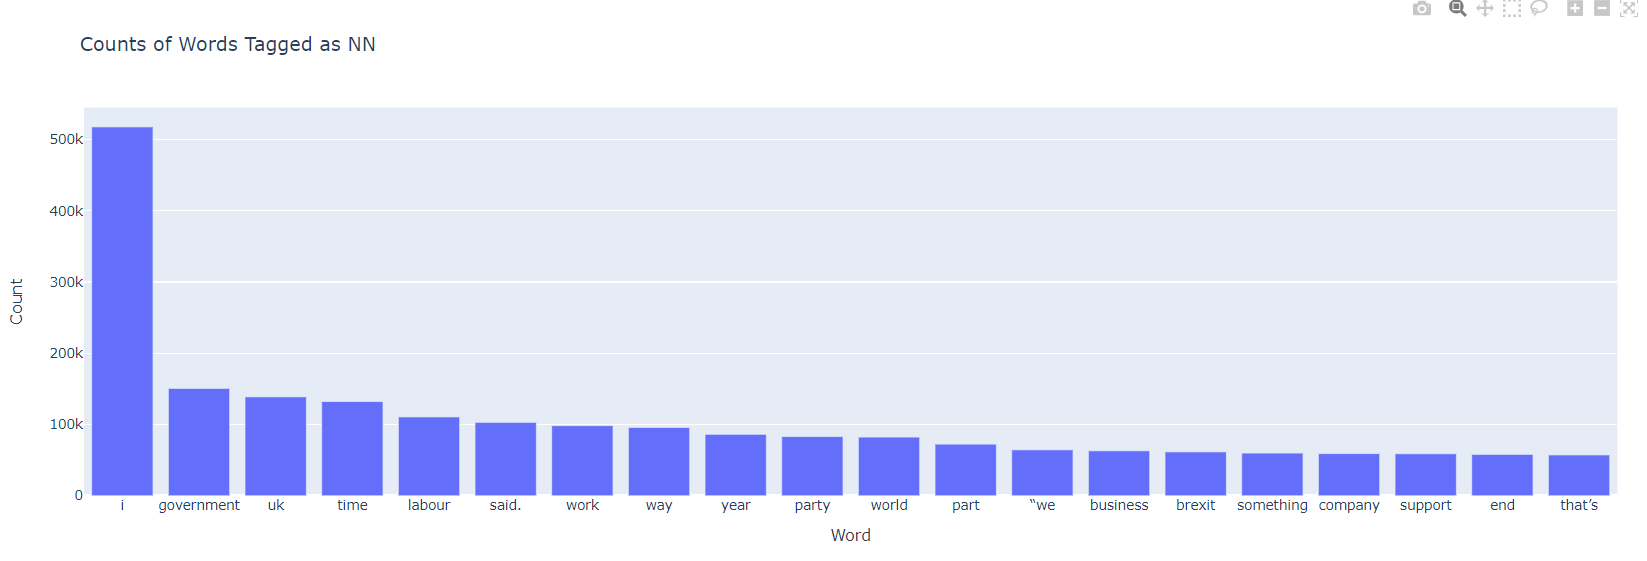

In [27]:
# Get the 20 highest values
top_20_nnp = heapq.nlargest(20, nnp.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict_nnp = dict(top_20_nnp)

# Extract keys and counts
keys = list(top_20_dict_nnp.keys())
counts = [v[0] for v in top_20_dict_nnp.values()]

# Create a DataFrame from the dictionary
df1 = pd.DataFrame(list(top_20_dict_nnp.items()), columns=['word', 'value'])
df1['count'] = df1['value'].apply(lambda x: x[0])

# Create a bar chart using Plotly
fig = px.bar(df1, x='word', y='count', title='Counts of Words Tagged as NNP', labels={'word': 'Word', 'count': 'Count'})

# Display the bar chart
fig.show(renderer="png")

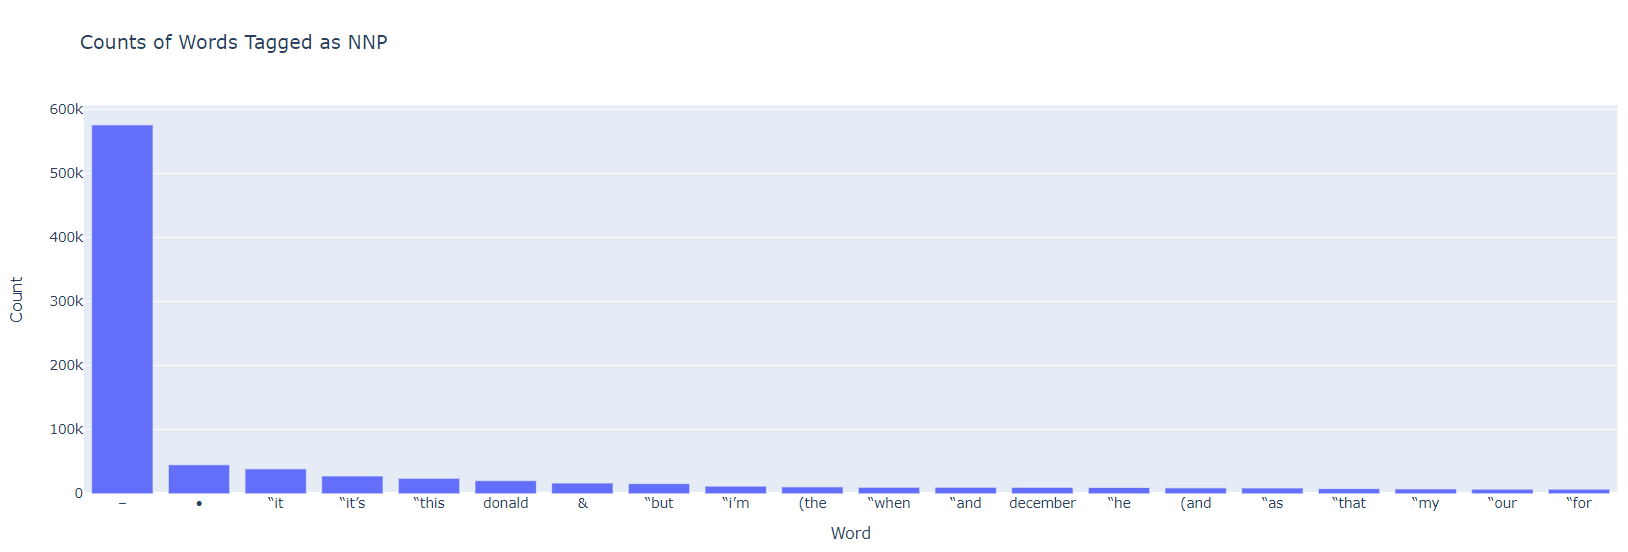

In [28]:
# Get the 20 highest values
top_20_nns = heapq.nlargest(20, nns.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict_nns = dict(top_20_nns)

# Extract keys and counts
keys = list(top_20_dict_nns.keys())
counts = [v[0] for v in top_20_dict_nns.values()]

# Create a DataFrame from the dictionary
df2 = pd.DataFrame(list(top_20_dict_nns.items()), columns=['word', 'value'])
df2['count'] = df2['value'].apply(lambda x: x[0])

# Create a bar chart using Plotly
fig = px.bar(df2, x='word', y='count', title='Counts of Words Tagged as NNS', labels={'word': 'Word', 'count': 'Count'})

# Display the bar chart
fig.show(renderer="png")

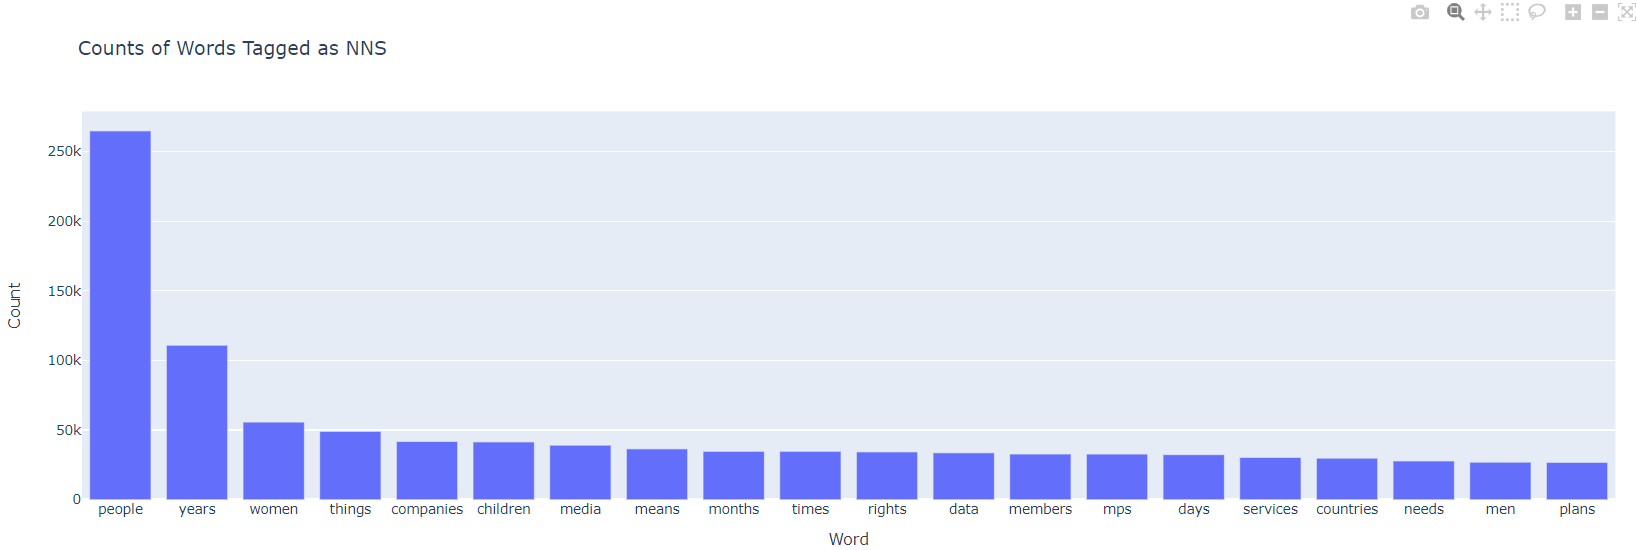

In [29]:
# Get the 20 highest values
top_20_nnps = heapq.nlargest(20, nnps.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict_nnps = dict(top_20_nnps)

# Extract keys and counts
keys = list(top_20_dict_nnps.keys())
counts = [v[0] for v in top_20_dict_nnps.values()]

# Create a DataFrame from the dictionary
df3 = pd.DataFrame(list(top_20_dict_nnps.items()), columns=['word', 'value'])
df3['count'] = df3['value'].apply(lambda x: x[0])

# Create a bar chart using Plotly
fig = px.bar(df3, x='word', y='count', title='Counts of Words Tagged as NNP', labels={'word': 'Word', 'count': 'Count'})

# Display the bar chart
fig.show(renderer="png")

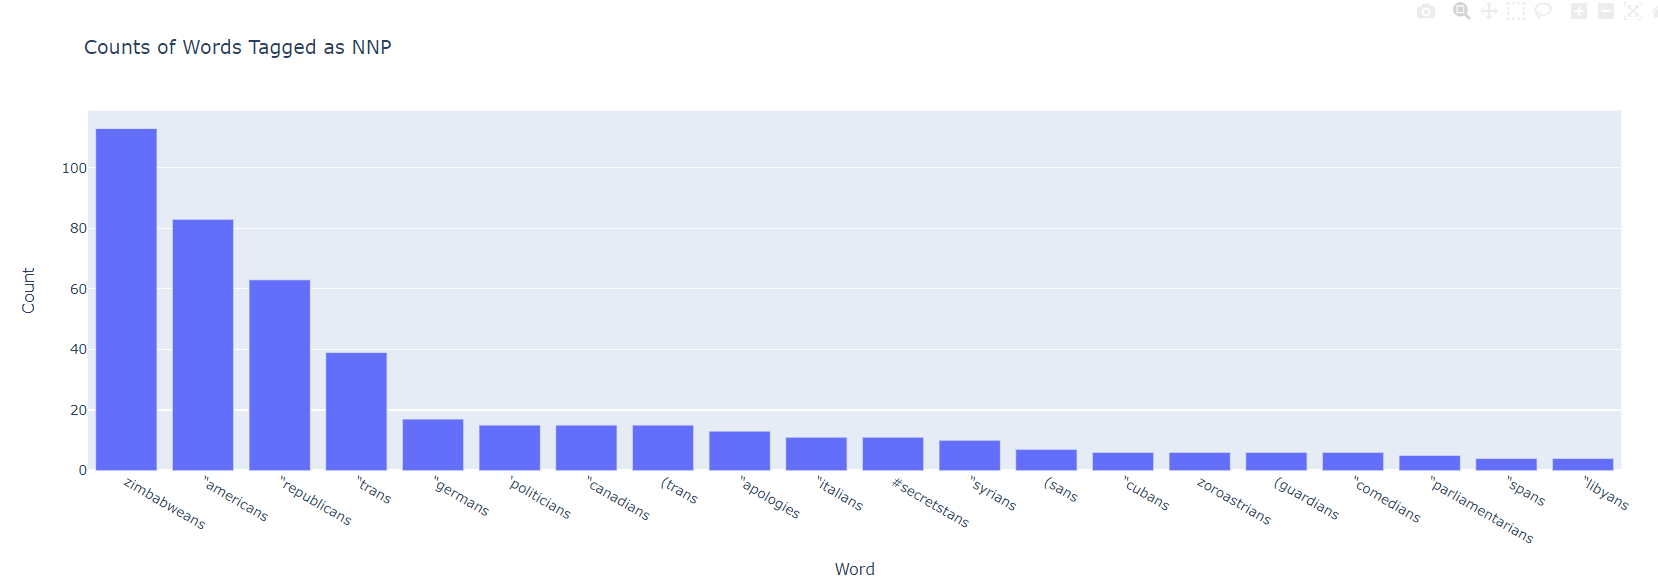

In [30]:
# Get the 20 highest values
top_20_v = heapq.nlargest(20, v.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict_v = dict(top_20_v)

# Extract keys and counts
keys = list(top_20_dict_v.keys())
counts = [v[0] for v in top_20_dict_v.values()]

# Create a DataFrame from the dictionary
df4 = pd.DataFrame(list(top_20_dict_v.items()), columns=['word', 'value'])
df4['count'] = df4['value'].apply(lambda x: x[0])

# Create a bar chart using Plotly
fig = px.bar(df4, x='word', y='count', title='Counts of Words Tagged as Verbs', labels={'word': 'Word', 'count': 'Count'})

# Display the bar chart
fig.show(renderer="png")

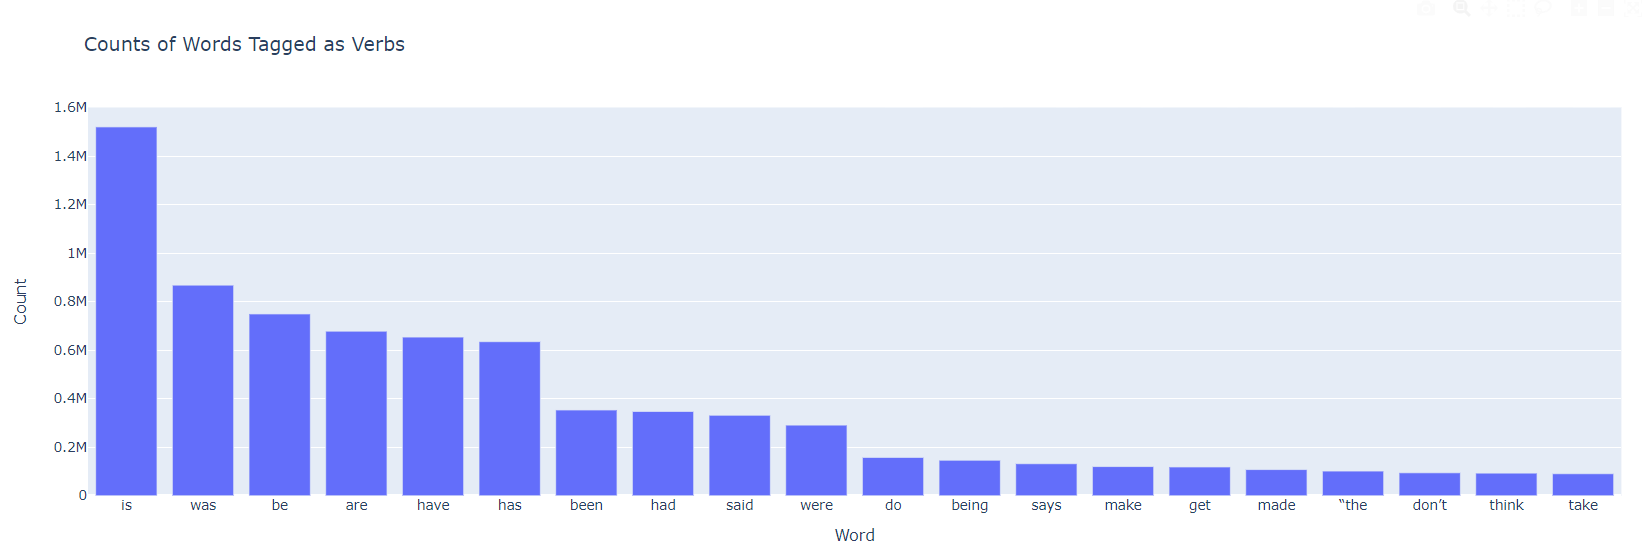

Removing stopwords and non-alphabetical characters:

In [31]:
# Get the list of stopwords
stop_words = set(stopwords.words('english'))

# Define a regex pattern for non-words (only keeping words with letters)
pattern = re.compile(r'^[a-zA-Z]+$')

# Filter the dictionary
filtered_dict = {k: v for k, v in word_dict_with_pos.items() if k.lower() not in stop_words and pattern.match(k)}

In [32]:
nn_stop = {k: v for k, v in filtered_dict.items() if v[1] == 'NN'}
v_stop = {k: v for k, v in filtered_dict.items() if v[1].startswith("V")}

In [33]:
# Get the 20 highest values
top_20_nn_stop = heapq.nlargest(20, nn_stop.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict_nn_stop = dict(top_20_nn_stop)

# Extract keys and counts
keys = list(top_20_dict_nn_stop.keys())
counts = [v[0] for v in top_20_dict_nn_stop.values()]

# Create a DataFrame from the dictionary
import pandas as pd
df5 = pd.DataFrame(list(top_20_dict_nn_stop.items()), columns=['word', 'value'])
df5['count'] = df5['value'].apply(lambda x: x[0])

# Create a bar chart using Plotly
fig = px.bar(df5, x='word', y='count', title='Counts of Words Tagged as NN', labels={'word': 'Word', 'count': 'Count'})

# Display the bar chart
fig.show(renderer="png")

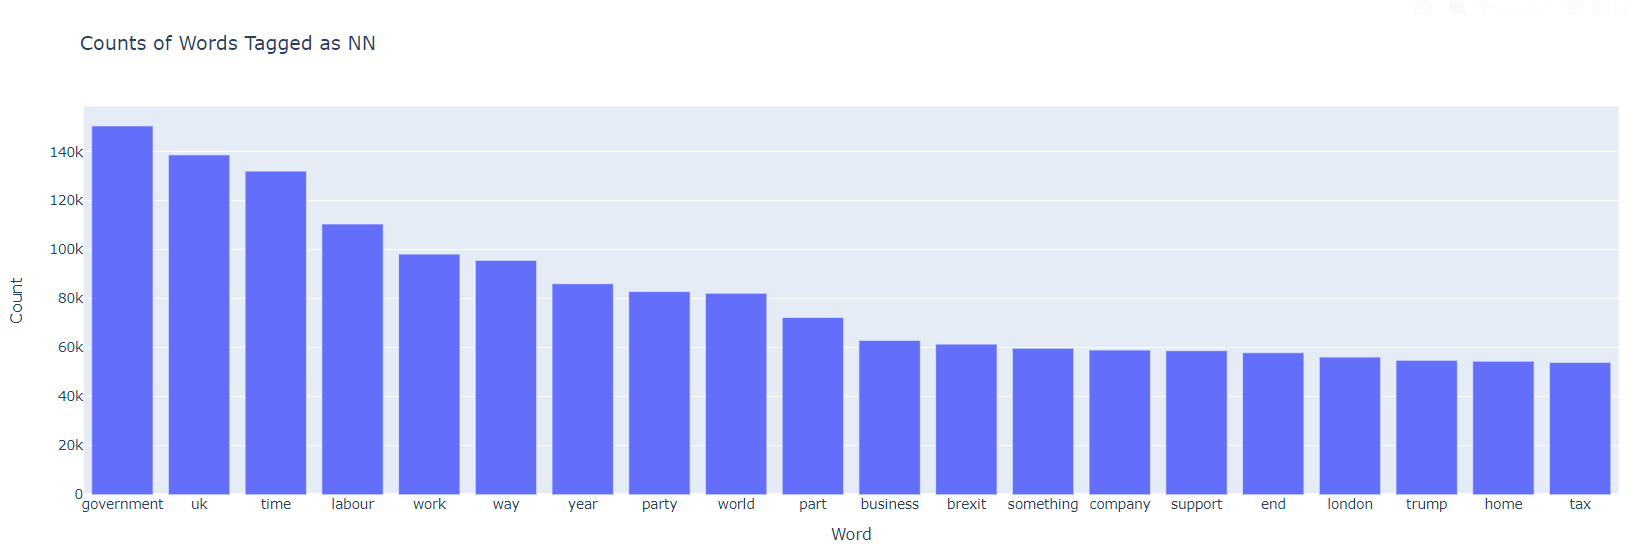

In [34]:
# Get the 20 highest values
top_20_v_stop = heapq.nlargest(20, v_stop.items(), key=lambda item: item[1])

# Convert the result to a dictionary if needed
top_20_dict_v_stop = dict(top_20_v_stop)

# Extract keys and counts
keys = list(top_20_dict_v_stop.keys())
counts = [v[0] for v in top_20_dict_v_stop.values()]

# Create a DataFrame from the dictionary
import pandas as pd
df6 = pd.DataFrame(list(top_20_dict_v_stop.items()), columns=['word', 'value'])
df6['count'] = df6['value'].apply(lambda x: x[0])

# Create a bar chart using Plotly
fig = px.bar(df6, x='word', y='count', title='Counts of Words Tagged as Verb', labels={'word': 'Word', 'count': 'Count'})

# Display the bar chart
fig.show(renderer="png")

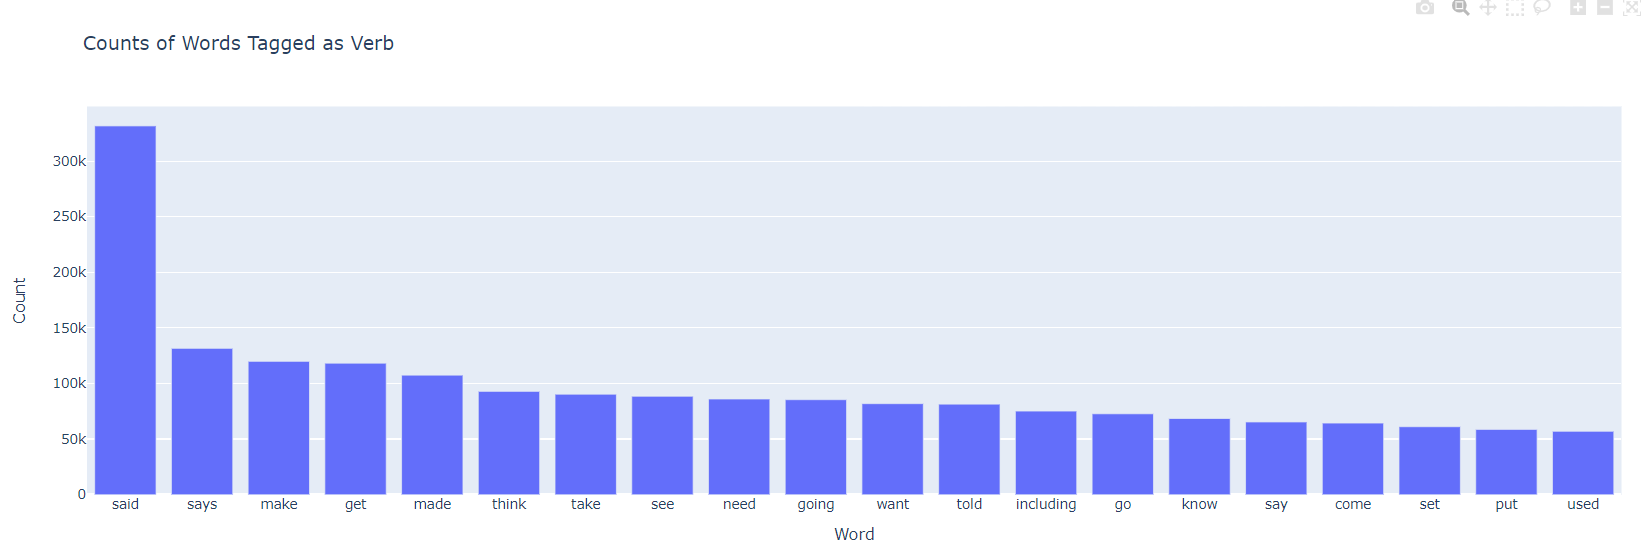

# Triplets Sample

In [26]:
sampled_df = df.sample(n=1000, random_state=42)

In [21]:
lemma = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

# Define a regex pattern for non-words (only keeping words with letters)
pattern = re.compile(r'^[a-zA-Z]+$')

In [22]:
def process(content):
  # Sentence tokenization
  sentences = sent_tokenize(content)
  # Process each sentence
  processed_sentences = [process_sentence(sentence) for sentence in sentences]
  return processed_sentences

In [23]:
# Function to process each sentence
def process_sentence(sentence):
    # Word tokenization
    words = word_tokenize(sentence)
    # Remove stop words
    filtered_words = [word for word in words if word.lower() not in stop_words and pattern.match(word)]
    #filtered_words = [word for word in words]
    # POS tagging
    pos_tags = pos_tag(filtered_words)
    return pos_tags

In [27]:
import time

# Start the timer
start_time = time.time()

# Your processing code
sampled_df['Processed Sentences'] = sampled_df['content'].apply(lambda x: process(x) if isinstance(x, str) else None)

# End the timer
end_time = time.time()

# Calculate the elapsed time
elapsed_time = end_time - start_time
print(f"Time taken to process the sentences: {elapsed_time} seconds")

Time taken to process the sentences: 48.62517213821411 seconds


To pos__tag every row in the 25518 dataset it took:

Time taken to process the sentences: 1230.8707716464996 seconds

In [29]:
sampled_df.head(0)

,type,sectionId,sectionName,webPublicationDate,webTitle,webUrl,content,Word Count,Year,Month,Processed Sentences


In [30]:
sampled_df.iloc[0]['webTitle']

'Palestinian event in London faces ban over Hamas links'

In [31]:
sampled_df.iloc[0]['content']

'One of the biggest Palestinian events in Europe scheduled to start in less than a fortnight is in doubt after intervention by the British government. Palestinian Expo, which includes political discussions, concerts, comedy acts, workshops, a food court and other events, is scheduled to run at the QE2 centre in London on the weekend of 8 and 9 July. The organisers are expecting the event to attract about 10,000 people. But the Department for Communities and Local Government, which is responsible for the QE2 Centre, wrote to the organisers on 14 June saying the secretary of state, Sajid Javid, was minded to terminate the contract. The letter cited “concerns that your organisation and those connected with it have expressed public support for a proscribed organisation, namely Hamas, and that you have supported events at which Hamas and Hizballah – also proscribed – have been praised”. The organisers, Friends of Al-Aqsa, wrote to the department complaining about the proposed ban. The depar

In [32]:
sampled_df.iloc[0]['Processed Sentences']

[[('One', 'CD'),
  ('biggest', 'JJS'),
  ('Palestinian', 'JJ'),
  ('events', 'NNS'),
  ('Europe', 'NNP'),
  ('scheduled', 'VBD'),
  ('start', 'RB'),
  ('less', 'JJR'),
  ('fortnight', 'JJ'),
  ('doubt', 'NN'),
  ('intervention', 'NN'),
  ('British', 'JJ'),
  ('government', 'NN')],
 [('Palestinian', 'JJ'),
  ('Expo', 'NNP'),
  ('includes', 'VBZ'),
  ('political', 'JJ'),
  ('discussions', 'NNS'),
  ('concerts', 'NNS'),
  ('comedy', 'NN'),
  ('acts', 'NNS'),
  ('workshops', 'VBP'),
  ('food', 'NN'),
  ('court', 'NN'),
  ('events', 'NNS'),
  ('scheduled', 'VBN'),
  ('run', 'VBP'),
  ('centre', 'JJ'),
  ('London', 'NNP'),
  ('weekend', 'NN'),
  ('July', 'NNP')],
 [('organisers', 'NNS'),
  ('expecting', 'VBG'),
  ('event', 'NN'),
  ('attract', 'NN'),
  ('people', 'NNS')],
 [('Department', 'NNP'),
  ('Communities', 'NNP'),
  ('Local', 'NNP'),
  ('Government', 'NNP'),
  ('responsible', 'JJ'),
  ('Centre', 'NNP'),
  ('wrote', 'VBD'),
  ('organisers', 'NNS'),
  ('June', 'NNP'),
  ('saying', 'VBG

In [33]:
def svo_creator(processed_content):
  svo = []
  for sentence in processed_content:
      triplet = []
      for word in  sentence:
        if word[1].startswith("N"):
            triplet.append(word)
        if word[1].startswith("V"):
              triplet.append((lemma.lemmatize(word[0], pos=wordnet.VERB), word[1]))
              #triplet.append(word)
      svo.append(triplet)
  return svo

In [34]:
sampled_df['SVO'] = sampled_df['Processed Sentences'].apply(lambda x: svo_creator(x))

In [35]:
def extract_svo_from_tags(pos_tags):
    svos = []
    subject = None
    verb = None
    obj = None

    i = 0
    while i < len(pos_tags):
        word, tag = pos_tags[i]
        if tag.startswith('N') and subject is None:
            subject = word
        elif tag.startswith('V') and subject is not None and verb is None:
            verb = word
        elif tag.startswith('N') and subject is not None and verb is not None:
            obj = word
            svos.append((subject, verb, obj))
            subject = None
            verb = None
            obj = None
        i += 1

    return svos

In [36]:
def triplets_extractor(svo):# Extract SVO triplets
  triplets = []
  for i, s in enumerate(svo):
    #print(svo[i])
    triplets.append(extract_svo_from_tags(svo[i]))

  return triplets

In [37]:
sampled_df['triplets'] = sampled_df['SVO'].apply(lambda x: triplets_extractor(x))

In [38]:
def filter_svo_triplets_with_keyword(data, keyword):
    filtered_triplets = []

    for triplet_list in data:
        for triplet in triplet_list:
            if keyword in triplet:
                filtered_triplets.append(triplet)

    return filtered_triplets

In [39]:
keyword = "government"
filtered_triplets = filter_svo_triplets_with_keyword([item for sublist in sampled_df['triplets'] for item in sublist], keyword)
print(filtered_triplets)

[('government', 'inquiry', 'arms'), ('government', 'say', 'charge'), ('government', 'allow', 'increase'), ('government', 'take', 'finance'), ('government', 'consider', 'cap'), ('government', 'ask', 'Europe'), ('government', 'keep', 'MEPs'), ('government', 'prepare', 'Hurricane'), ('government', 'survive', 'lawsuits'), ('government', 'want', 'pursue'), ('government', 'raise', 'questions'), ('government', 'get', 'phone'), ('government', 'state', 'Apple'), ('government', 'want', 'Apple'), ('government', 'offer', 'path'), ('party', 'say', 'government'), ('government', 'say', 'test'), ('government', 'offer', 'suggestion'), ('government', 'seem', 'postpone'), ('government', 'ax', 'deal'), ('election', 'call', 'government'), ('softer', 'make', 'government'), ('government', 'promise', 'slogan'), ('government', 'grave', 'damage'), ('doctors', 'need', 'government'), ('injury', 'leak', 'government'), ('government', 'consume', 'recognise'), ('government', 'tell', 'BBC'), ('government', 'elect', 'i

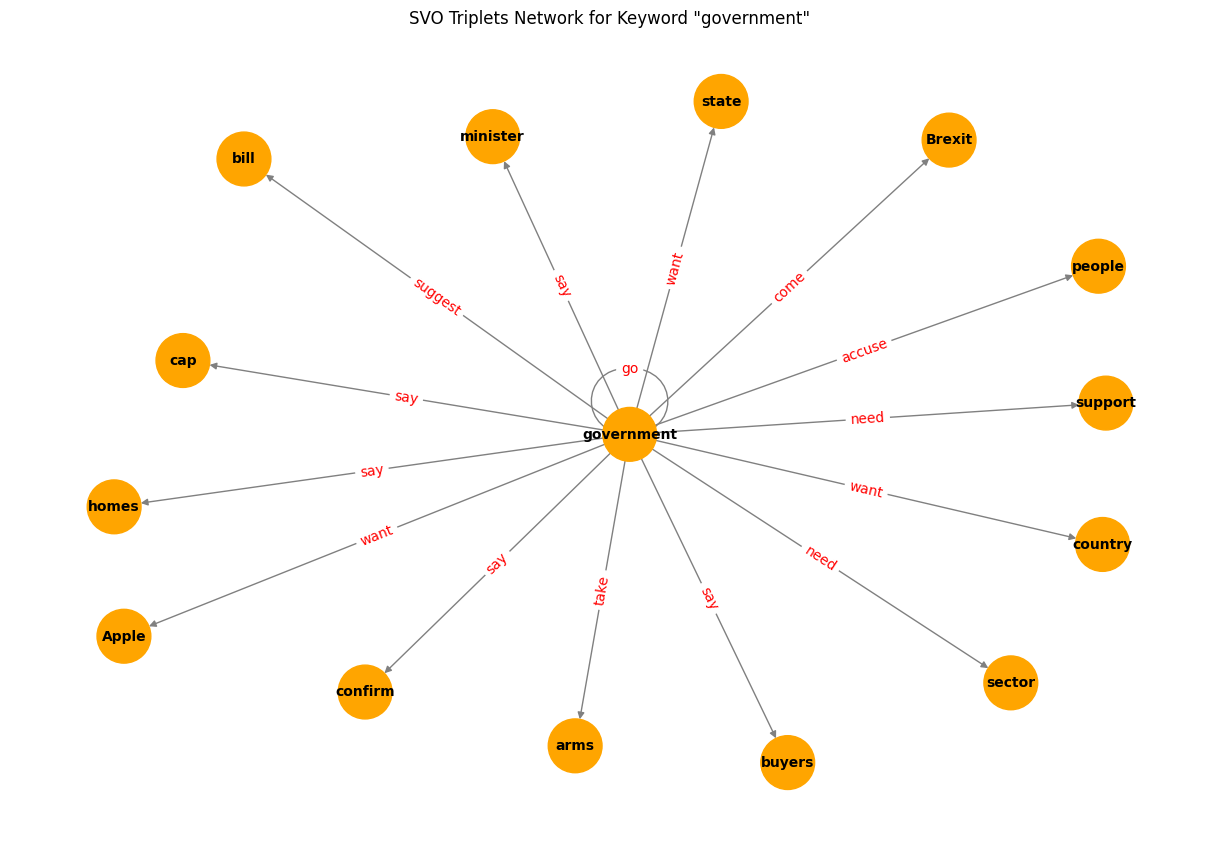

In [40]:
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter

# Initialize counters for objects and verbs
object_counter = Counter()
verb_counter = Counter()

# Count occurrences of objects and verbs
for svo in filtered_triplets:
    subject, verb, obj = svo
    verb_counter[verb] += 1
    object_counter[obj] += 1

# Get the 20 most common objects and verbs
common_objects = [item for item, count in object_counter.most_common(20)]
common_verbs = [item for item, count in verb_counter.most_common(20)]

# Filter triplets to include only the most common objects and verbs
filtered_common_triplets = [
    triplet for triplet in filtered_triplets
    if triplet[1] in common_verbs and triplet[2] in common_objects
]

# Create the network graph
G = nx.DiGraph()

# Add the central node "SEC"
G.add_node('government', type='subject', color='blue', size=3000)

# Add edges and nodes
for subject, verb, obj in filtered_common_triplets:
    G.add_node(obj, type='object', color='orange', size=1500)
    G.add_edge('government', obj, label=verb)

# Draw the network graph
pos = nx.spring_layout(G, k=2)
node_colors = [G.nodes[node]['color'] for node in G.nodes]
node_sizes = [G.nodes[node]['size'] for node in G.nodes]
edge_labels = nx.get_edge_attributes(G, 'label')

plt.figure(figsize=(12, 8))
nx.draw(G, pos, with_labels=True, node_size=node_sizes, node_color=node_colors, font_size=10, font_weight='bold', edge_color='gray')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

plt.title('SVO Triplets Network for Keyword "government"')
plt.show()